In [31]:
library("nortest")
library("ggplot2")

In [32]:
#Datasource: https://www.kaggle.com/datasets/nayanack/shipping/data
shipping <- read.csv("shipping.csv", header=TRUE)
head(shipping)

ID Warehouse_block Mode_of_Shipment Customer_care_calls Customer_rating
1 1  D               Flight           4                   2              
2 2  F               Flight           4                   5              
3 3  A               Flight           2                   2              
4 4  B               Flight           3                   3              
5 5  C               Flight           2                   2              
6 6  F               Flight           3                   1              
  Cost_of_the_Product Prior_purchases Product_importance Gender
1 177                 3               low                F     
2 216                 2               low                M     
3 183                 4               low                M     
4 176                 4               medium             M     
5 184                 3               medium             F     
6 162                 3               medium             F     
  Discount_offered Weight_in_gms Reached.on.Time_Y.N
1 44               1233          1                  
2 59               3088          1                  
3 48               3374          1                  
4 10               1177          1                  
5 46               2484          1                  
6 12               1417          1


	Anderson-Darling normality test

data:  shipping$Cost_of_the_Product
A = 104.94, p-value < 2.2e-16


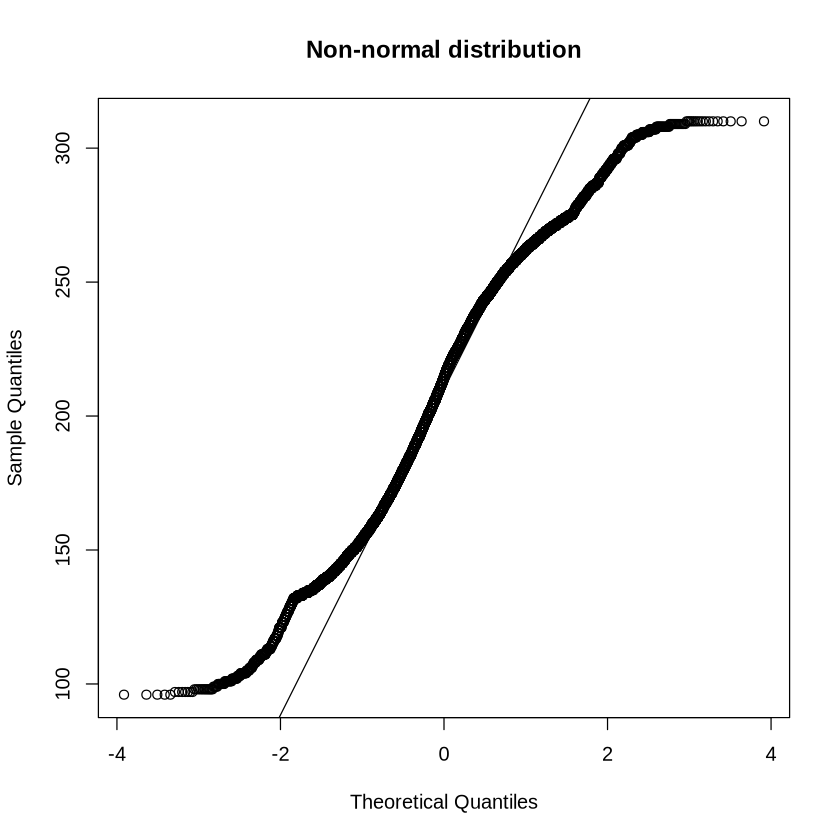

In [29]:
#Normality check
ad.test(shipping$Cost_of_the_Product)
qqnorm(shipping$Cost_of_the_Product, main='Non-normal distribution')
qqline(shipping$Cost_of_the_Product)

In [30]:
#Using Mann-Whitney non-parametric U test because the distribution wasn't normal.
shipping_for_m <- shipping$Cost_of_the_Product[shipping$Gender == "M"]
shipping_for_f <- shipping$Cost_of_the_Product[shipping$Gender == "F"]

wilcox.test(x = shipping_for_m, y = shipping_for_f)


	Wilcoxon rank sum test with continuity correction

data:  shipping_for_m and shipping_for_f
W = 15475546, p-value = 0.03332
alternative hypothesis: true location shift is not equal to 0


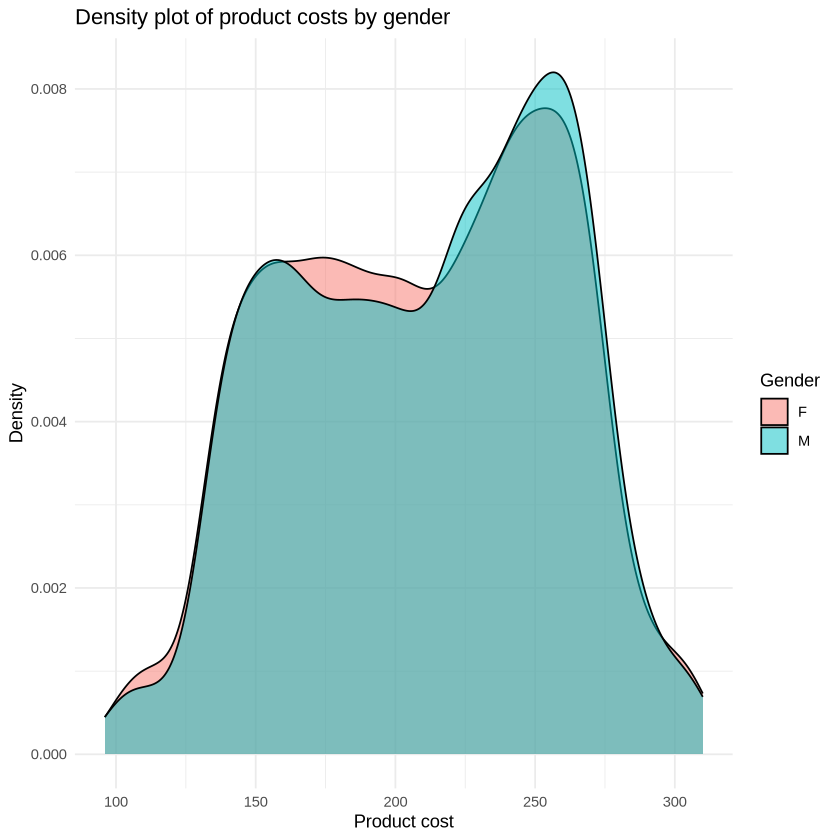

In [38]:
#Visualization of difference
ggplot(shipping, aes(x = Cost_of_the_Product, fill = Gender)) +
  geom_density(alpha = 0.5) +
  theme_minimal() +
  labs(title = "Density plot of product costs by gender", x = "Product cost", y = "Density")